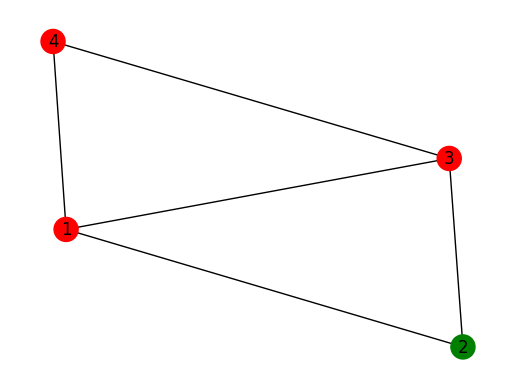

In [5]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

def is_clique(graph, vertices):
    for v1, v2 in itertools.combinations(vertices, 2):
        if v2 not in graph[v1]:
            return False
    return True

def find_maximum_clique(graph):
    max_clique = set()
    for size in range(len(graph), 0, -1):
        for vertices in itertools.combinations(graph, size):
            if is_clique(graph, vertices):
                max_clique = set(vertices)
                break
        if max_clique:
            break
    return max_clique

def visualize_cliques(graph):
    # Create a NetworkX graph from the input graph
    G = nx.Graph(graph)
    
    # Find the maximum cliques in the graph
    max_clique = find_maximum_clique(graph)
    cliques = list(nx.find_cliques(G))
    
    # Set node colors for the maximum cliques and non-maximum cliques
    node_colors = ['blue'] * len(G.nodes())
    for clique in cliques:
        if set(clique) == max_clique:
            color = 'green'
        else:
            color = 'red'
        for node in clique:
            node_colors[list(G.nodes()).index(node)] = color
    
    # Draw the graph with the node colors
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off')
    plt.show()

# Example usage:
graph = {
    1: [2, 3, 4],
    2: [1, 3],
    3: [1, 2, 4],
    4: [1, 3]
}
visualize_cliques(graph)
